# **RNNs part 2: Modern Recurring Units - GRUs and LSTMs**

# **GRUs and LSTMs**

There are going more modern recurrent units such as GRU and LSTM. 
- In the simplest RNN, we use the Simple Recurring Unit (SRU). We actually will not be using these simple recurrent units (only for introductory purposes).
- Simple recurrent units are undesirable. 
- In modern times, **the GRU and the LSTM are just what we use by default most of the times**.

**The main reasons are**: 
- The vanishing and exploding gradients;
- Modern units are able to learn long-term dependencies.

# **GRU: Gated Recurring Unit**

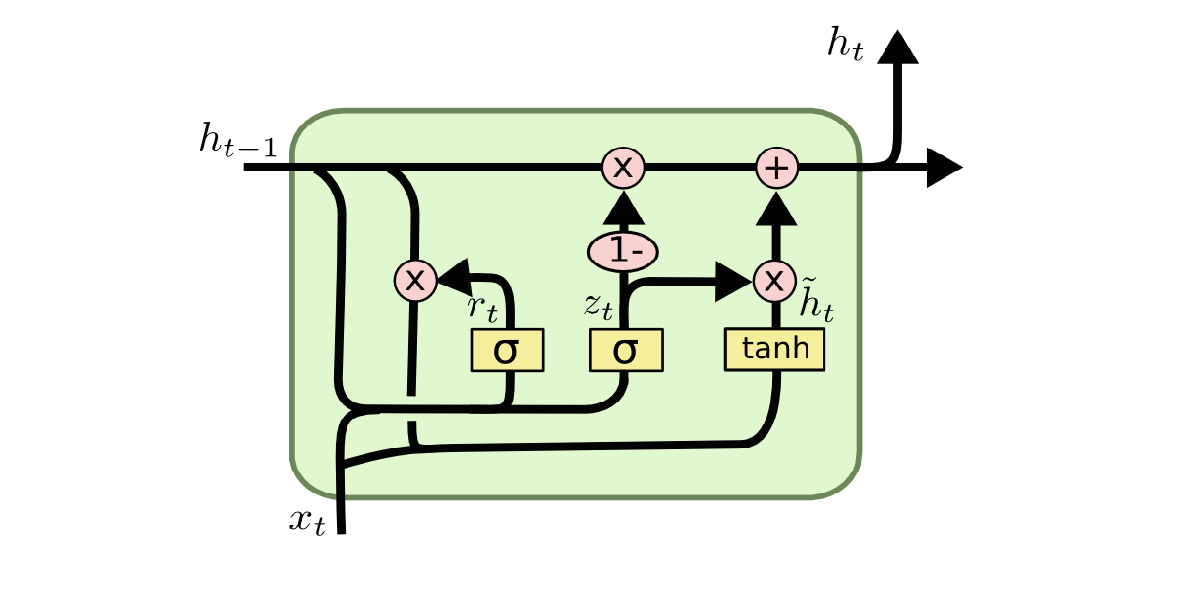

Gates allow the hidden layer to "remember" or to "forget" certain values.

With the GRU We have two gates: we call zₜ the update gate; and we call rₜ the reset gate.

If you look at rₜ, it gets multiplied by  rₜ-1 element-wise. So the circle operator means element-wise multiplication (Hadamard product) on the image below.

https://en.wikipedia.org/wiki/Hadamard_product_(matrices)

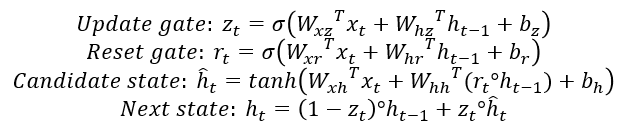

Since rₜ is the output of a sigmoid, it **contains only values between zero and one**.
- If we have something closer to zero, that tells us: "**forget about what was inside this cell of hₜ-1**. Just forget what was there by making it closer to zero". 
- If it is closer to 1, that is saying: "**remember what was in that cell of hₜ-1. That value is important to remember**". 
- Then, it works like a binary mask, but instead of only binary values, 0 and 1, **there is a spectrum between 0 and 1 where you have different degrees of remembering and forgetting**.

We then use xₜ and hₜ-1 to create a candidate value for each hₜ, which will call ĥₜ. In a simple RNN, this would typically be it: "We would just set this to hₜ and be done".

Notice how the equation for ĥₜ is very similar to the equation for hₜ and a simple recurrent unit, except for the reset gate.

But in a GRU, we have yet another gate **zₜ. This tells us how much of the candidate hₜ do we want to keep, and how much of the old hₜ-1 do we want to keep**.

Notice how we multiply by either zₜ or (1 - zₜ). **We are always getting the weighted average of these two to create the new hₜ**.
- **This also has sort of a remembering and forgetting function**: if zₜ is very small, then (1 - zₜ) is bigger and closer to 1. That is just saying: "remember what was hₜ-1 before".
- Otherwise, if zₜ is close to 1, then it is saying: "take more of what's in ĥₜ". 

By having these remembering and forgetting functions, we can make the neural network learn long-term dependencies.

Example of **long-term dependency**: suppose in a paragraph we used the structure "His contribution was...". We want that, many sentences later, the neural network still remembers that it should use the pronouns "he" and "his", instead of "she" and "her".

#### **The noun-verb agreement throughout the whole text is a typical case of long-term dependency. We need the remembering and forgetting functions to be able to perform it correctly**.

# **System of Neural Networks**

One convenient way of conceptualizing GRU and LSTM is that they are just a mini-systems of neural networks.

Look at the equations on the image above:
- The update gate is made of a mini-binary classification neural network.
- The reset gate has a similar format: it is also just a mini-binary classification neural network.
- Actually, **they are just logistic regressions, which is even simpler**.
- The prediction for the hidden state is itself the output of a mini-neural network.
- Basically, you have these many neural networks (or neurons) everywhere, and they are all making their own little predictions about: **what the hidden state should be, how much to remember or forget, and so on**.

# **Concatenation Trick**

One trick you can do for convenience is that: you see how xₜ and hₜ-1 appear together very often. These equations are also quite long.

So what you can do when implementing them is just **concatenate xₜ and hₜ-1 together into one big vector of size M plus D**. 
- Then, create a giant weight matrix of size M x (M + D), so that you only have one matrix multiply to do. You can verify that this has the exact same number of parameters, but it is easier to write things this way.

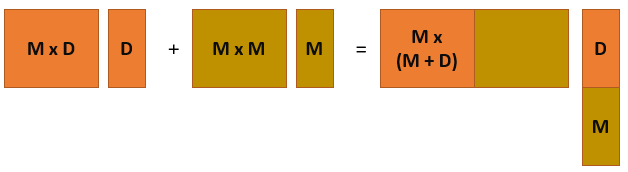

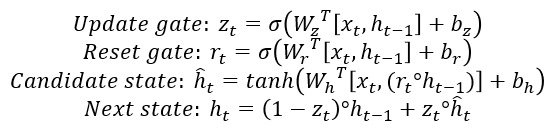

# **LSTM**

The LSTM is basically a very complicated version of the GRU.

Actually, the LSTM came out long before the GRU was invented, in 1997.

The GRU, in turns, is a more recent invention.

## **GRU**

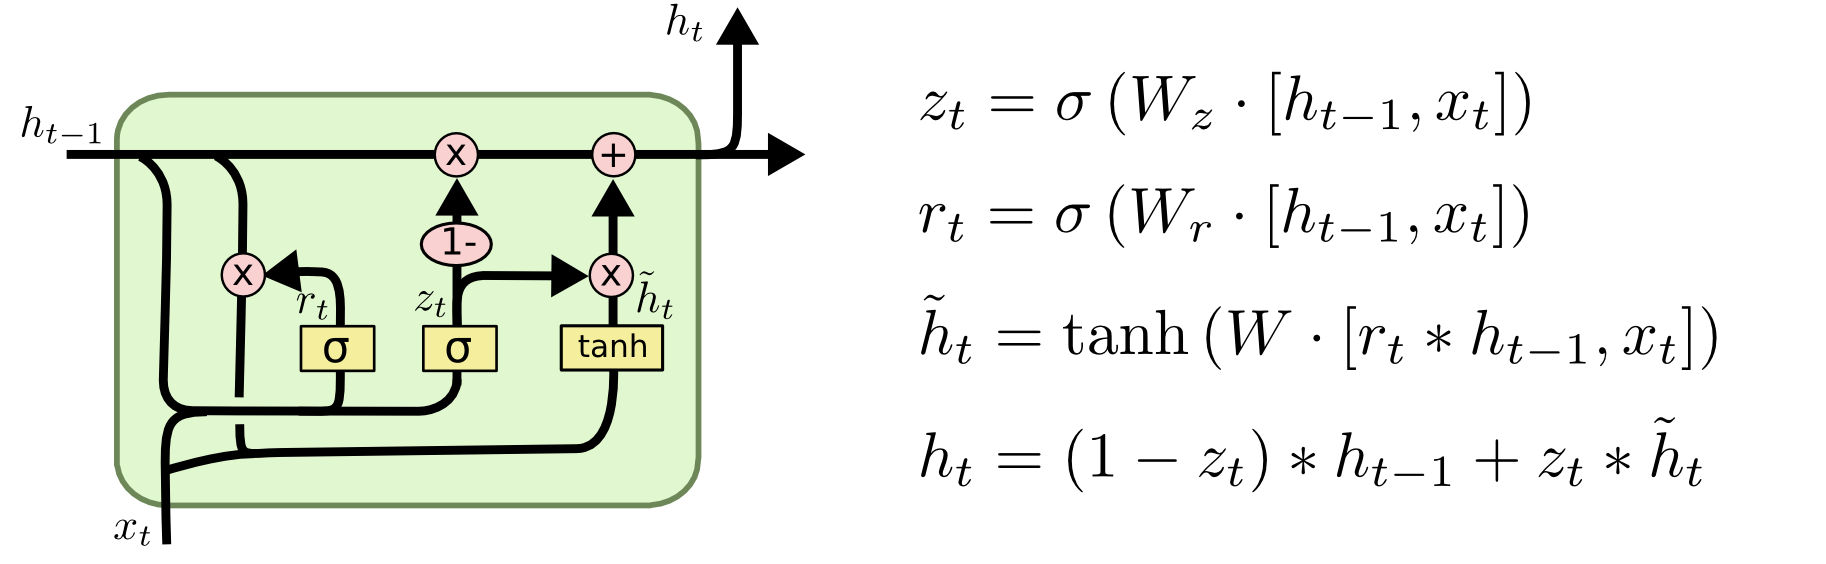

## **LSTM**

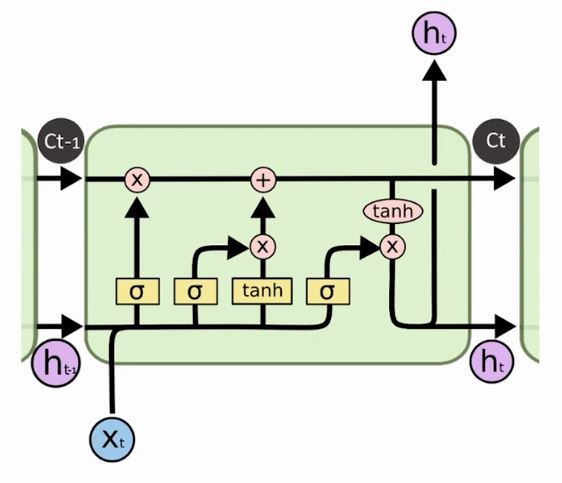

cₜ: cell state;

hₜ: hidden state.

Notice how this diagram is way more complicated than the GRU diagram. That is because there are many more equations and many more parameters in the LSM than in the GRU.

What you can get out of this diagram **is an unique characteristic of the LSTM: it has two states, cₜ and hₜ**. We typically call hₜ the hidden state, hence the letter H; and we call cₜ the cell state, hence the letter C.

In LSTM, we basically have a gate for everything:

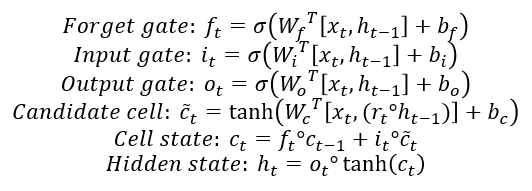

Importantly, we now have two state vectors: cₜ and hₜ.

cₜ kind of takes on hₜ old role (seen in GRU); and hₜ is now just a small modification of cₜ. Here we have a forget gate, an input gate, and then an output gate. 
- The input gate tells us how much of the candidate c̋ₜ to keep.
- Note that, in GRU, zₜ perform both of these roles. In LSTM, forget and input are separate gates.
- If you remember in the GRU, we just have zₜ and then (1 - zₜ).
- Finally, **the output gate just tells us how much of the cell to pass on to the output hₜ**.

NOTE: sometimes we call cₜ "the cell", not to be confused with other uses of the word cell, such as an element of a table, or an element of a vector.

Within LSTM, we refer to hₜ as the hidden state, and cₜ as the cell state, **even though they are more just like two different hidden states**.

So, just remember that the LSTM outputs two things: h and c.

# **Which should I use the GRU or the LSTM?**

- There are actually some papers that have compared these to on performing different tasks, and the **consensus has been that they are about equal**.
- The GRU performs better sometimes, and the LSTM performs better sometimes, but only slightly better.
- As with most machine learning models, **you just have to try them to determine which one is best for your particular dataset**.

# **In Keras**

One important thing to remember for the implementation is what the API looks like in Keras for the GRU and the LSTM.
- Normally, a layer outputs one thing:

```
output = Dense(128) (input)
```
- This is the output of that layer.
- With recurrent units, we actually have the option to output the hidden states as well.
- In both GRU and LSTM, **pass in the argument return_state = True** to output the states.
- GRU:
```
output, h = GRU(128, return_state = True) (input)
```
- LSTM:
```
output, h, c = LSTM(128, return_state = True) (input)
```

Now, one question you might have is: what is the difference between a recurrent layer's output and its hidden state h?
- The answer, surprisingly, is that they are not different. **They actually output the same thing**.
- The **output is just h itself**.

One exception to this is if you pass in yet another argument called **return_sequences = True**. 
- This is an important argument that we are going to use in the code.
- If you do this, then you will get a sequence of output values, but the hidden state and the cell state will still only give you a final value.

```
output, h, c = LSTM(128, return_state = True, return_sequences = True) (input)
output is a sequence;
h, c are not sequences.
```